In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2018-02-21 09:41:56.658655


In [2]:
# define directories
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/'
figDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Figs/'

In [3]:
# read in data
Qmat = scipy.io.loadmat(os.path.join(dataDir, "Qstore_1_am_con.mat"))
Vmat = scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_con.mat"))

In [4]:
Qmat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Qstore'])

In [5]:
Vmat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ValSp3'])

In [6]:
Qdta = Qmat["Qstore"]
dd = pd.DataFrame(Qdta)
dd['time'] = np.arange(0, 2, 2.0002e-04)
cols = dd.columns.tolist()
dd = dd[[cols[-1]] + cols[:-1]] 
print(dd.shape)

(10000, 20001)


In [7]:
dd['timestep'] = (np.floor(np.arange(0, 100, step = 0.01))).astype(int)
cols = dd.columns.tolist()
dd = dd[[cols[-1]] + cols[:-1]] 

In [8]:
dd.head()

,timestep,time,0,1,2,3,4,5,6,7,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0,0.0000,0.000000,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.785398,3.926991,0.000100,0.000100,0.000000,0.000000
1,0,0.0002,0.000103,0.000041,0.785405,3.926991,1.003792,0.422649,0.048971,0.000594,...,0.012709,0.027796,4.027603e-07,-0.000124,0.785407,3.926990,-0.011122,-1.211176,0.066204,-0.005158
2,0,0.0004,0.000405,0.000172,0.785416,3.926991,1.983931,0.868754,0.057278,0.003731,...,0.032963,0.054989,-5.700732e-06,-0.000489,0.785423,3.926989,-0.049237,-2.395544,0.085917,-0.007513
3,0,0.0006,0.000906,0.000393,0.785429,3.926992,2.963612,1.315319,0.064795,0.006861,...,0.053276,0.082060,-1.955832e-05,-0.001092,0.785442,3.926987,-0.087493,-3.579753,0.105314,-0.010017
4,0,0.0008,0.001603,0.000703,0.785442,3.926994,3.943133,1.762049,0.072037,0.009950,...,0.073520,0.109017,-4.117008e-05,-0.001935,0.785465,3.926985,-0.126621,-4.763069,0.123132,-0.012591


In [9]:
#%qtconsole

In [10]:
cc = np.zeros(Qdta.shape).reshape((-1, 100*8))
cc.shape

(250000, 800)

In [11]:
# another possible way to rearrange the data
stt = time.time()

ss = 8 # number of columns to repeat
cctr = 0 # output row counter


rctr = 0 # row counter for input data
    
while rctr < Qdta.shape[0]:
    
    ii = 0 # column counter for input data
    while ii < Qdta.shape[1]:
        a = np.array(dd.iloc[rctr:(rctr + 100), ii + 2:ii + 2 + ss])
        bb = np.array(np.zeros(a.shape)).reshape([1, -1])
        bb.shape

        for kk in np.arange(0, a.shape[0], step = 1):
            bb[0, kk*ss:(kk+1)*ss] = a[kk, 0:ss]  

        ii += ss
    
        cc[cctr, :] = bb
        cctr += 1
    # update row counter
    print(str(cctr) + " of " + str(cc.shape[0]))
    rctr += 100

    
print(str(np.round(time.time() - stt)) + " Seconds")

2500 of 250000
5000 of 250000
7500 of 250000
10000 of 250000
12500 of 250000
15000 of 250000
17500 of 250000
20000 of 250000
22500 of 250000
25000 of 250000
27500 of 250000
30000 of 250000
32500 of 250000
35000 of 250000
37500 of 250000
40000 of 250000
42500 of 250000
45000 of 250000
47500 of 250000
50000 of 250000
52500 of 250000
55000 of 250000
57500 of 250000
60000 of 250000
62500 of 250000
65000 of 250000
67500 of 250000
70000 of 250000
72500 of 250000
75000 of 250000
77500 of 250000
80000 of 250000
82500 of 250000
85000 of 250000
87500 of 250000
90000 of 250000
92500 of 250000
95000 of 250000
97500 of 250000
100000 of 250000
102500 of 250000
105000 of 250000
107500 of 250000
110000 of 250000
112500 of 250000
115000 of 250000
117500 of 250000
120000 of 250000
122500 of 250000
125000 of 250000
127500 of 250000
130000 of 250000
132500 of 250000
135000 of 250000
137500 of 250000
140000 of 250000
142500 of 250000
145000 of 250000
147500 of 250000
150000 of 250000
152500 of 250000
15500

In [ ]:
plt.figure(figsize=(20,100))
plt.imshow(cc, cmap='hot', interpolation='nearest')

plt.show()

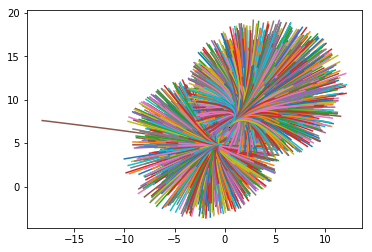

In [12]:
# double check
for ii in np.arange(5000, 10000):
    plt.plot(cc[ii, np.arange(0, 800, step = 8)], cc[ii, np.arange(1, 800, step = 8)])

In [13]:
# make data frame and name columns
tsDf = pd.DataFrame(cc)

In [14]:
tsDf["timestep"] = np.floor(np.arange(0,tsDf.shape[0]) / 2500).astype(int)
tsDf.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,timestep
0,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,0.000103,0.000041,...,0.105628,0.968817,0.443503,0.792317,3.928647,96.741614,44.518128,0.579362,0.105284,0
1,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000117,0.000197,...,0.978434,-1.141089,1.901742,0.829301,3.942507,-115.911668,189.558075,3.781962,0.970563,0
2,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000020,0.000046,...,1.081065,-0.221566,0.473263,0.792738,3.938398,-22.267928,47.326604,0.668543,1.090916,0
3,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000249,0.000625,...,3.876513,-2.419618,6.005867,0.839302,3.976986,-248.123231,598.452247,4.329931,3.878763,0
4,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000201,-0.000035,...,2.034838,-1.969747,-0.331231,0.788964,3.947531,-196.920202,-33.251375,0.378515,2.055139,0


In [15]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [16]:
jj = 0
hh = []
for jj in range(100):
    hh.append([new_cols[ii] +"_" +str(jj) for ii in range(8)])

allCols = np.concatenate(hh)

In [17]:
tsDf.columns = np.append(allCols, "timestep")

In [18]:
tsDf.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_1,y_1,...,phi_dot_98,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,timestep
0,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,0.000103,0.000041,...,0.105628,0.968817,0.443503,0.792317,3.928647,96.741614,44.518128,0.579362,0.105284,0
1,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000117,0.000197,...,0.978434,-1.141089,1.901742,0.829301,3.942507,-115.911668,189.558075,3.781962,0.970563,0
2,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000020,0.000046,...,1.081065,-0.221566,0.473263,0.792738,3.938398,-22.267928,47.326604,0.668543,1.090916,0
3,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000249,0.000625,...,3.876513,-2.419618,6.005867,0.839302,3.976986,-248.123231,598.452247,4.329931,3.878763,0
4,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000201,-0.000035,...,2.034838,-1.969747,-0.331231,0.788964,3.947531,-196.920202,-33.251375,0.378515,2.055139,0


In [19]:
forceAngle = np.transpose(Vmat["ValSp3"])
fa = forceAngle.reshape((250000, 12), order = "C" )
fa2=  pd.DataFrame(fa)
fa2.columns = np.append([new_cols[ii] +"_" +str(99) for ii in range(8)], ["F", "alpha", "tao", "cost"])
fa2["Fx"] = fa2.F * np.cos(fa2.alpha)
fa2["Fy"] = fa2.F * np.sin(fa2.alpha)
fa2.shape

(250000, 14)

In [20]:
combDF = pd.merge(tsDf.dropna(), fa2.dropna(), 
                  left_on = [new_cols[ii] +"_" +str(99) for ii in range(8)], 
                  right_on = [new_cols[ii] +"_" +str(99) for ii in range(8)], 
                  how = "inner")


In [21]:
combDF.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_1,y_1,...,y_dot_99,theta_dot_99,phi_dot_99,timestep,F,alpha,tao,cost,Fx,Fy
0,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,0.000103,0.000041,...,44.518128,0.579362,0.105284,0,6381.845153,6.084240,13183.387403,4.179519e+08,6255.966663,-1261.280566
1,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000117,0.000197,...,189.558075,3.781962,0.970563,0,13311.590039,1.279596,88270.211620,7.807610e+07,3821.792206,12751.169896
2,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000020,0.000046,...,47.326604,0.668543,1.090916,0,3897.277025,1.106111,-12274.028413,3.972981e+08,1746.530301,3484.020683
3,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000249,0.000625,...,598.452247,4.329931,3.878763,0,36814.819368,1.149410,28313.300409,1.361690e+09,15058.212175,33594.362193
4,0.0,0.0,0.785398,3.926991,0.0001,0.0001,0.0,0.0,-0.000201,-0.000035,...,-33.251375,0.378515,2.055139,0,10861.320196,2.424572,-48780.397529,8.197244e+08,-8186.907034,7137.424579


In [22]:
combDF.shape

(218757, 807)

In [77]:
# show how many NA's were dropped
fa2.shape[0] - fa2.dropna().shape[0]

31243

### Finished data munging

Now fit models

In [110]:
X = combDF.iloc[:, np.concatenate((np.arange(0,8), np.arange(792,800)))].copy()
Y = combDF.iloc[:, [803, 805, 806]]

# # subtract x_0 and y_0 from everything
X.x_99 = X.x_99 - X.x_0
X.y_99 = X.y_99 - X.y_0

X.x_0 = X.y_0 = 0


In [111]:
Y.head()

,tao,Fx,Fy
0,13183.387403,6255.966663,-1261.280566
1,88270.211620,3821.792206,12751.169896
2,-12274.028413,1746.530301,3484.020683
3,28313.300409,15058.212175,33594.362193
4,-48780.397529,-8186.907034,7137.424579


In [112]:
X.tail()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99
218752,0,0,0.810586,5.882462,413.538429,259.637536,-0.39727,-3.891716,9.466440,1.557219,0.778801,5.822799,533.620947,-107.433234,1.904527,-0.868037
218753,0,0,0.810586,5.882462,413.538429,259.637536,-0.39727,-3.891716,1.761254,2.676026,0.791533,5.848080,-235.592983,7.587859,2.840541,1.189457
218754,0,0,0.810586,5.882462,413.538429,259.637536,-0.39727,-3.891716,1.048029,5.133191,0.581016,5.681105,-299.925489,273.867886,-7.912733,-7.622437
218755,0,0,0.810586,5.882462,413.538429,259.637536,-0.39727,-3.891716,12.401741,-0.856860,0.778731,5.856763,825.415328,-350.413834,1.793406,2.418050
218756,0,0,0.810586,5.882462,413.538429,259.637536,-0.39727,-3.891716,1.386108,3.933006,0.730037,5.806925,-272.790013,139.464566,-1.125382,-1.050569


In [113]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state = 123)

In [114]:
# refref: scale test and training separately:
from sklearn.preprocessing import StandardScaler  
scalerX = StandardScaler()  
scalerY = StandardScaler()  

# Don't cheat - fit only on training data
scalerX.fit(Xtrain)  
scalerY.fit(Ytrain) 

Xtrain_scaled = scalerX.transform(Xtrain)  
Ytrain_scaled = scalerY.transform(Ytrain)  

# apply same transformation to test data
Xtest_scaled = scalerX.transform(Xtest)
Ytest_scaled = scalerY.transform(Ytest)

In [115]:
xcheck = scalerX.inverse_transform(Xtrain_scaled)
np.allclose(xcheck, np.array(Xtrain))

True

In [116]:
# save scalers
import pickle

with open(os.path.join(dataDir, "StandardScaler_zerod.pkl"), 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([scalerX, scalerY], f)

In [117]:
del scalerX
del scalerY

In [118]:
# Getting back the objects:
with open(os.path.join(dataDir, "StandardScaler_zerod.pkl"), 'rb') as f:  # Python 3: open(..., 'rb')
    scalerX, scalerY = pickle.load(f)

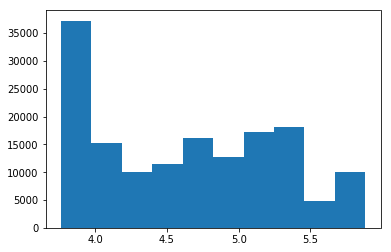

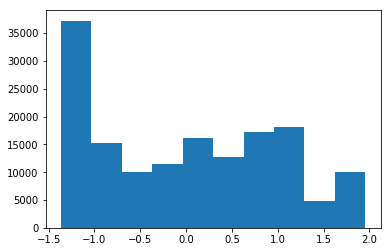

(array([ 37237.,  15288.,   9992.,  11562.,  16143.,  12687.,  17205.,
         18190.,   4762.,  10063.]),
 array([ 3.76014613,  3.97247606,  4.18480598,  4.39713591,  4.60946584,
         4.82179577,  5.03412569,  5.24645562,  5.45878555,  5.67111548,
         5.8834454 ]),
 <a list of 10 Patch objects>)

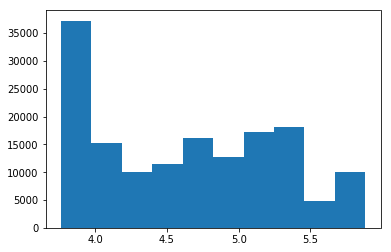

In [121]:
# check scaler
plt.hist(Xtrain.iloc[:, 3])
plt.show()
plt.hist(Xtrain_scaled[:,3])
plt.show()

xcheck = scalerX.inverse_transform(Xtrain_scaled)
plt.hist(xcheck[:,3])

In [122]:
print(Xtrain.shape,  Ytrain.shape, Xtest.shape, Ytest.shape)

(153129, 16) (153129, 3) (65628, 16) (65628, 3)


In [123]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [124]:
# stt = time.time()
# mor = MultiOutputRegressor(RandomForestRegressor(500, n_jobs = 4)).fit(Xtrain_scaled, Ytrain_scaled)
# print(time.time() - stt) # ~ 13 minutes

In [125]:
# # save RF model
# from sklearn.externals import joblib
# joblib.dump(mor, os.path.join(dataDir, "FitRF_Scaled2.pkl")) 

In [126]:
# mpreds = mor.predict(Xtest_scaled)

In [127]:
# plt.close("all")
# fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = 0.1, wspace=0.3)
# fig.suptitle('Predicted vs. acutal for Mulit-output Random Forest Regressor (500 trees)', fontsize=14, fontweight='bold')

# axs = axs.ravel()
# nms = ["tao", "Fx", "Fy"]


# for ii in range(3):
#     # read in image
    
#     try:
#         axs[ii].scatter(y = Ytest_scaled[:,ii],x = mpreds[:,ii], s = 1, c= 'indianred' )
#         axs[ii].set_xlabel("Predicted Value (Scaled)")
#         if(ii == 0):
#             axs[ii].set_ylabel("Actual Value\n(Scaled)")
#             axs[ii].set_xlim([-10, 5])
#         axs[ii].set_title(nms[ii])
#         axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'maroon')
#     except:
#         pass

    
# fig.savefig(os.path.join(figDir, "RFpreds_Scaled2.png"), dpi = 120, bbox_inches='tight')

## Multi-output neural network

In [170]:
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor


In [171]:
stt = time.time()
nn1 = MLPRegressor(solver='lbfgs', alpha=0,
                  hidden_layer_sizes=(100, 6), max_iter=10000, 
                  activation='tanh', verbose = True)
nnMod = MultiOutputRegressor(nn1).fit(Xtrain_scaled, Ytrain_scaled)
print(time.time() - stt) # takes 128 minutes on MBPro

8033.72908115387


In [172]:
# save nn, so I can reload without retraining
from sklearn.externals import joblib
joblib.dump(nnMod, os.path.join(dataDir, "TrainedNN_scaled_zerod.pkl")) 

['/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/TrainedNN_scaled_zerod.pkl']

In [173]:
# load trained nn

In [174]:

# nnMod = joblib.load(os.path.join(dataDir, "TrainedNN_scaled_zerod.pkl")) 

In [175]:
nnpreds = nnMod.predict(Xtest_scaled)

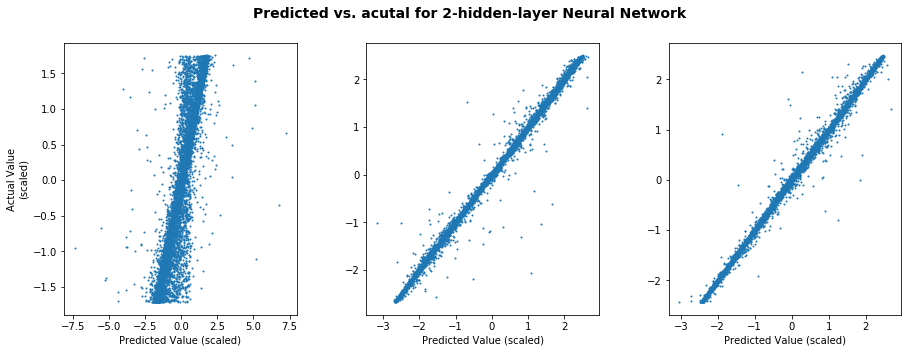

In [176]:
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal for 2-hidden-layer Neural Network', fontsize=14, fontweight='bold')

axs = axs.ravel()


for ii in range(3):
    # read in image
    
    try:
        axs[ii].scatter(y = Ytest_scaled[:,ii],x = nnpreds[:,ii], s = 1 )
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'b')
    except:
        pass

    
fig.savefig(os.path.join(figDir, "NNPreds2_zerod.png"), dpi = 120, bbox_inches='tight')

# Compare simulation vs. nn preds for test set!

In [179]:
s1 = pd.concat([Xtest, Ytest], axis = 1).reset_index(drop = True)

shuff2 = s1

# predictions
XX_scaled = scalerX.transform(shuff2.iloc[:, 0:16])
nnpreds3 = nnMod.predict(XX_scaled)

# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tao_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,-74216.783633,-25709.938231,-25442.874055,36170.993407,3.921770
1,19305.300090,37968.800743,10039.283056,39273.617533,0.258493
2,-60332.190646,-1621.528650,10007.333363,10137.853629,1.731434
3,84905.065321,-5307.368370,243.343592,5312.944111,3.095775
4,13507.583614,18762.032149,11914.613678,22225.477935,0.565786


In [180]:
s2_1 = pd.concat([shuff2, preds1], axis = 1)
s2_1.head()

,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,...,theta_dot_99,phi_dot_99,tao,Fx,Fy,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,0,0,0.795294,3.790989,239.937302,309.348620,0.404731,1.594923,4.816044,-0.564773,...,-4.341190,-2.134953,-77433.033185,-25628.131415,-25523.878200,-74216.783633,-25709.938231,-25442.874055,36170.993407,3.921770
1,0,0,0.644764,4.763821,60.202435,148.059332,7.160955,5.271670,5.503482,8.482467,...,-3.218599,-3.361796,18089.782425,37940.533360,9762.998893,19305.300090,37968.800743,10039.283056,39273.617533,0.258493
2,0,0,0.893044,4.201614,-223.457896,-115.794523,1.574985,4.389546,-6.088273,-1.646655,...,6.690121,8.437772,-60364.180694,-1595.364131,10278.321177,-60332.190646,-1621.528650,10007.333363,10137.853629,1.731434
3,0,0,0.731254,3.790280,96.881935,433.571014,3.494534,1.151334,1.172913,7.870384,...,2.298592,-0.526332,85436.509798,-5325.574919,299.875035,84905.065321,-5307.368370,243.343592,5312.944111,3.095775
4,0,0,0.775803,5.883445,-293.943864,-93.559409,1.898227,4.144514,-5.085509,1.862793,...,-1.350964,-1.797883,11771.326101,18384.826107,11987.076192,13507.583614,18762.032149,11914.613678,22225.477935,0.565786


In [181]:
s2_1.to_csv(os.path.join(dataDir, "simulationData5_withFinal_testset.csv"), index=False)
print(dataDir)

simSet1 = s2_1.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tao_pred','F_pred','alpha_pred']]


simSet1.to_csv(os.path.join(dataDir, "simulationDataset5_blinded_testset.csv"), index=False)
simSet1.head()

/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/


,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,tao_pred,F_pred,alpha_pred
0,0,0,0.795294,3.790989,239.937302,309.348620,0.404731,1.594923,-74216.783633,36170.993407,3.921770
1,0,0,0.644764,4.763821,60.202435,148.059332,7.160955,5.271670,19305.300090,39273.617533,0.258493
2,0,0,0.893044,4.201614,-223.457896,-115.794523,1.574985,4.389546,-60332.190646,10137.853629,1.731434
3,0,0,0.731254,3.790280,96.881935,433.571014,3.494534,1.151334,84905.065321,5312.944111,3.095775
4,0,0,0.775803,5.883445,-293.943864,-93.559409,1.898227,4.144514,13507.583614,22225.477935,0.565786


In [182]:
simSet1.shape

(65628, 11)

___

In [169]:
baseDir

'/Users/cswitzer/Documents/GitRepos/MothMachineLearning'

In [ ]:
# refref: run simulation vs. nn preds for test set!


___
### Create dataset with same initial conditions and shuffle output conditions

In [149]:
s1 = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800), [801, 802, 803]])].sample(1000, random_state = 1234)
s1.reset_index(inplace = True)

# set x_0 and y_0 to (0,0)  -- refref: may want to do this for training, actually
s1.x_99 = s1.x_99 - s1.x_0
s1.y_99 = s1.y_99 - s1.y_0

s1.x_0 = 0
s1.y_0 = 0

s1.head()

,index,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,F,alpha,tao
0,65433,0,0,1.218912,5.279960,-282.178321,25.384868,0.512417,3.815208,-3.826264,6.363681,1.206249,5.278257,-105.213445,612.918946,-9.564721,-6.010770,34711.223602,0.048683,-21546.366304
1,150408,0,0,0.838372,4.796263,-449.460406,-345.496726,-8.543574,-12.022193,-12.201699,-11.563311,0.803864,4.759027,-773.534180,-806.935424,1.462614,2.249079,30126.798461,3.261109,-23793.182944
2,100894,0,0,0.700075,3.821712,-15.767140,328.863071,3.711074,1.593024,-1.017825,4.343780,0.702317,3.850536,-84.737423,104.116621,-1.058561,1.566400,12006.327025,3.696790,-80547.398899
3,10419,0,0,0.846342,4.103379,-217.686826,-70.645510,1.330150,3.882703,-0.230315,-4.312012,0.888065,4.125910,194.865308,-356.245459,0.288916,-1.520441,27004.516941,4.836658,48644.667847
4,79929,0,0,1.078063,5.255050,-26.858621,-281.889198,4.816433,7.902859,-1.617297,-2.644279,1.313633,4.564085,-236.580539,13.658690,-61.358082,-72.967395,18947.321758,0.730189,-2695.707148


In [150]:
s1.columns

Index(['index', 'x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0',
       'theta_dot_0', 'phi_dot_0', 'x_99', 'y_99', 'theta_99', 'phi_99',
       'x_dot_99', 'y_dot_99', 'theta_dot_99', 'phi_dot_99', 'F', 'alpha',
       'tao'],
      dtype='object')

In [152]:
sTemp = s1.loc[:, ['x_99', 'y_99', 'theta_99', 'phi_99',
       'x_dot_99', 'y_dot_99', 'theta_dot_99', 'phi_dot_99']]
sInit = s1.loc[:, ['index', 'x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0',
       'theta_dot_0', 'phi_dot_0']]

shuff = sTemp.sample(sTemp.shape[0], random_state = 12346)
shuff2 = pd.concat([sInit, shuff.reset_index(drop = True)], axis = 1)



shuff2.tail()

,index,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,y_99,theta_99,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99
995,5507,0,0,0.801778,3.999793,-107.650328,-12.338765,-0.414259,2.563437,-10.480517,6.348220,1.252464,5.797655,-419.340991,446.892834,2.538909,3.692815
996,136712,0,0,0.955304,4.164625,358.629417,106.590516,-1.535126,1.243797,4.825600,2.129829,0.921581,4.293083,332.464250,44.927067,-2.521983,0.663849
997,194771,0,0,0.784979,4.833840,-281.967130,139.946079,-13.089813,-13.995425,0.111581,-7.222963,0.663903,3.765613,-35.708018,-460.479984,-1.891207,0.160552
998,47559,0,0,1.268370,5.061921,-336.872765,188.762640,1.454598,4.905653,6.361284,7.205744,0.722216,3.781973,539.799070,285.424061,-2.763494,-2.387397
999,139087,0,0,0.976205,4.220369,-236.665843,-345.225384,1.014989,4.355812,5.379149,2.417871,0.886119,4.166709,259.407246,91.894908,0.854763,0.984045


In [155]:
# predictions
XX_scaled = scalerX.transform(shuff2.iloc[:, 1:17])
nnpreds3 = nnMod.predict(XX_scaled)

# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tao_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,16601.974774,-1621.117454,-69098.153810,69117.167778,4.688932
1,83496.000653,57956.667506,1473.863259,57975.404969,0.025425
2,-68361.889712,23884.092755,7635.246273,25074.825471,0.309412
3,77502.226584,-29914.932641,-15472.614148,33679.444525,3.618922
4,-102411.664405,22304.911324,80429.708991,83465.245208,1.300273


In [156]:
s2_1 = pd.concat([shuff2, preds1], axis = 1)
s2_1.head()

,index,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,x_99,...,phi_99,x_dot_99,y_dot_99,theta_dot_99,phi_dot_99,tao_pred,Fx_pred,Fy_pred,F_pred,alpha_pred
0,65433,0,0,1.218912,5.279960,-282.178321,25.384868,0.512417,3.815208,8.747397,...,4.648057,587.301544,-427.003455,-1.703149,-1.641784,16601.974774,-1621.117454,-69098.153810,69117.167778,4.688932
1,150408,0,0,0.838372,4.796263,-449.460406,-345.496726,-8.543574,-12.022193,-1.908333,...,4.456775,-92.358492,158.216372,2.340360,3.005993,83496.000653,57956.667506,1473.863259,57975.404969,0.025425
2,100894,0,0,0.700075,3.821712,-15.767140,328.863071,3.711074,1.593024,2.132820,...,4.010811,172.414994,759.272579,2.461602,3.051731,-68361.889712,23884.092755,7635.246273,25074.825471,0.309412
3,10419,0,0,0.846342,4.103379,-217.686826,-70.645510,1.330150,3.882703,-3.852715,...,3.821599,-160.859157,-331.639394,1.411461,-1.694321,77502.226584,-29914.932641,-15472.614148,33679.444525,3.618922
4,79929,0,0,1.078063,5.255050,-26.858621,-281.889198,4.816433,7.902859,-17.125379,...,5.841108,-737.571312,272.005264,1.702976,-0.207120,-102411.664405,22304.911324,80429.708991,83465.245208,1.300273


In [157]:
s2_1.to_csv(os.path.join(dataDir, "simulationData4_withFinal.csv"), index=False)
print(dataDir)

simSet1 = s2_1.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tao_pred','F_pred','alpha_pred']]


simSet1.to_csv(os.path.join(dataDir, "simulationDataset4_blinded.csv"), index=False)
simSet1.head()

/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/


,x_0,y_0,theta_0,phi_0,x_dot_0,y_dot_0,theta_dot_0,phi_dot_0,tao_pred,F_pred,alpha_pred
0,0,0,1.218912,5.279960,-282.178321,25.384868,0.512417,3.815208,16601.974774,69117.167778,4.688932
1,0,0,0.838372,4.796263,-449.460406,-345.496726,-8.543574,-12.022193,83496.000653,57975.404969,0.025425
2,0,0,0.700075,3.821712,-15.767140,328.863071,3.711074,1.593024,-68361.889712,25074.825471,0.309412
3,0,0,0.846342,4.103379,-217.686826,-70.645510,1.330150,3.882703,77502.226584,33679.444525,3.618922
4,0,0,1.078063,5.255050,-26.858621,-281.889198,4.816433,7.902859,-102411.664405,83465.245208,1.300273


In [ ]:
# refref: might get better predictions if we set initial X and Y to (0,0) and
# and transform output X and Y relative to the start

--- Dataset to check in Jorge's simulation ---

In [ ]:
## generate dataset for Jorge to send to model
s1 = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800), [801, 802, 803]])].sample(1000)
s1.head()

In [ ]:
# predictions
XX_scaled = scalerX.transform(s1.iloc[:, 0:16])
nnpreds2 = nnMod.predict(XX_scaled)

In [ ]:
s1.iloc[:, 0:16].shape

In [ ]:
s1["Fx"] = s1.F * np.cos(s1.alpha)
s1["Fy"] = s1.F * np.sin(s1.alpha)
s1.head()

In [ ]:
# compute F, alpha, to double check
s1["F_"] = np.sqrt(s1.Fx **2 + s1.Fy **2)


pre_alpha = np.arctan2(s1.Fy, s1.Fx )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (s1.Fy[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
s1["alpha_"] = alpha
s1.head()

In [ ]:
YY_scaled = scalerY.transform(s1.iloc[:, [18, 19, 20]])
pd.DataFrame(YY_scaled).head()

In [ ]:
# plot to double-check
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal for subset', fontsize=14, fontweight='bold')

axs = axs.ravel()

# convert back to original values
nn_back = scalerY.inverse_transform(nnpreds2)
YY_orig = s1.iloc[:, [18, 19, 20]]


for ii in range(3):
    # read in image
    
    try:
        axs[ii].scatter(y = YY_orig.iloc[:,ii],x = nn_back[:,ii], s = 1 )
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(nn_back[:,ii], nn_back[:,ii], 'b')
    except:
        pass

In [ ]:
# add predictions to data frame
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tao_pred", "Fx_pred", "Fy_pred"]
preds1.head()

In [ ]:
cc2 = pd.concat([s1.reset_index(drop=True), preds1.reset_index(drop=True)], axis = 1)
cc2.head()

In [ ]:
cc2["F_pred"] = np.sqrt(cc2.Fx_pred **2 + cc2.Fy_pred **2)


pre_alpha = np.arctan2(cc2.Fy_pred, cc2.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (cc2.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
cc2["alpha_pred"] = alpha

In [ ]:
cc2.head()

In [ ]:
cc2.columns

In [ ]:
cc2.to_csv(os.path.join(dataDir, "simulationData1_withFinal.csv"), index=False)
print(dataDir)

In [ ]:
simSet1 = cc2.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tao_pred','F_pred','alpha_pred']]
simSet1.head()

In [ ]:
simSet1.to_csv(os.path.join(dataDir, "simulationDataset1_blinded.csv"), index=False)
print(dataDir)

--- Dataset #2 ---

In [ ]:
## now build another training dataset, that is random combinations of initial values

def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [ ]:
ss = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800)])].sample(1500)
ss.reset_index(drop = True, inplace = True)
ss.head()

In [ ]:
s2 = shuffle(ss)
s2.head()

In [ ]:
# predict on shuffled data
s2_scaled = scalerX.transform(s2)
nnpreds3 = nnMod.predict(s2_scaled)

In [ ]:
# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tao_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s2_1 = pd.concat([s2, preds1], axis = 1)
s2_1.head()

In [ ]:
s2_1.to_csv(os.path.join(dataDir, "simulationData2_withFinal.csv"), index=False)

simSet2 = s2_1.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tao_pred','F_pred','alpha_pred']]

simSet2.to_csv(os.path.join(dataDir, "simulationDataset2_blinded.csv"), index=False)
simSet2.head()

___

___ Dataset 3 -- Sample initial and get randomized final states 

#
#
#


___

In [ ]:
ss = combDF.iloc[:, np.hstack([np.arange(0,8),np.arange(792,800)])].sample(1200)
ss.reset_index(drop = True, inplace = True)
ss.head()

In [ ]:
# only mix up possible output states
s3_1 = shuffle(ss.iloc[:, 8:])
s3_2 = pd.concat([ss.iloc[:,0:8], s3_1], axis = 1)
s3_2.head()

In [ ]:
# predict on shuffled data
s3_scaled = scalerX.transform(s3_2)
nnpreds3_1 = nnMod.predict(s3_scaled)

In [ ]:
# add preds back to data frame
nn_back = scalerY.inverse_transform(nnpreds3_1)
preds1 = pd.DataFrame(nn_back)
preds1.columns = ["tao_pred", "Fx_pred", "Fy_pred"]
preds1["F_pred"] = np.sqrt(preds1.Fx_pred **2 + preds1.Fy_pred **2)


pre_alpha = np.arctan2(preds1.Fy_pred, preds1.Fx_pred )
alpha = pre_alpha.copy()

for ii in pre_alpha.index:
    if (preds1.Fy_pred[ii] > 0) :
        alpha[ii] = pre_alpha[ii]
    else:
        alpha[ii] = (2*np.pi) + pre_alpha[ii]
        
preds1["alpha_pred"] = alpha


preds1.head()

In [ ]:
s3_4 = pd.concat([s3_2, preds1], axis = 1)
s3_4.head()

In [ ]:
s3_4.to_csv(os.path.join(dataDir, "simulationData3_withFinal.csv"), index=False)

simSet3 = s3_4.loc[:, ['x_0', 'y_0', 'theta_0', 'phi_0', 'x_dot_0', 'y_dot_0', 'theta_dot_0',
       'phi_dot_0', 'tao_pred','F_pred','alpha_pred']]

simSet3.to_csv(os.path.join(dataDir, "simulationDataset3_blinded.csv"), index=False)
simSet3.head()

In [ ]:
## nn practice

Xx = np.transpose(np.array([np.arange(-10, 10, step = 0.001), np.random.uniform(size = 20000)]))
Xx_scaled = sklearn.preprocessing.scale(Xx, axis = 0)
Yy = np.sin(Xx[:,0]) *4 **2 + 50
Yy_scaled = sklearn.preprocessing.scale(Yy, axis = 0)
plt.plot(Xx_scaled[:,0], Yy)
plt.show()
plt.scatter(Xx_scaled[:,1], Yy, s = 1)

In [ ]:
plt.hist(Xx_scaled[:,1])

In [ ]:
stt = time.time()
nn1 = MLPRegressor(solver='lbfgs', alpha=0,
                  hidden_layer_sizes=(10,10), max_iter=1000, 
                  verbose = True, tol=0.0000100,
                  activation='tanh')
nnMod = nn1.fit(Xx_scaled, Yy)
print(time.time() - stt)

In [ ]:
nnpreds = nnMod.predict(Xx_scaled)

In [ ]:
plt.scatter(x = Xx_scaled[:,0], y = Yy)
plt.scatter(x = Xx_scaled[:,0], y = nnpreds)

In [ ]:
plt.scatter(x = Xx_scaled[:,0], y = Yy_scaled)
plt.scatter(x = Xx_scaled[:,0], y = nnpreds)

In [ ]:
plt.scatter(x = nnpreds, y = Yy)

In [ ]:
# merge with F, alpha, tao
Vdta = Vmat["ValSp3"]
dd2 = pd.DataFrame(Vdta)
dd2.columns = np.append([new_cols[ii] +"_" +str(99) for ii in range(8)], ["F", "alpha", "tao"])
print(dd2.shape)
dd2.head()

In [ ]:
ff = dd


stp = 8
for stp in np.arange(10):
    xx = 1
    yy = 2
    for ii in np.arange(1000):
        plt.scatter(ff.iloc[stp*100:(stp+1)*100,xx], ff.iloc[stp*100:(stp+1)*100, yy], s = 1)
        xx += 8
        yy +=8
    plt.show()


In [ ]:
ii = 200

for jj in np.arange(0, dta.shape[0], step = 8):
    plt.scatter(dta[ii:ii+100, jj], dta[ii:ii+100, jj + 1], s = 1)

In [ ]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [ ]:
# another possible way to rearrange the data
ss = 8
a = dta
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb.shape

In [ ]:
a.shape[1]
a.shape[0]
pd.DataFrame(a[0:10, :])

In [ ]:
for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  

    
cc = pd.DataFrame(bb)
cc.columns = new_cols
cc

In [ ]:
for ii in np.arange(0, 10000, step = 100):
    plt.scatter(cc.loc[ii:ii+100, "x"],cc.loc[ii:ii+100, "y"], s = 1)

In [ ]:
dd2 = dta.reshape((-1, 8))
dd3 = pd.DataFrame(dd2)

In [ ]:
dd3.columns =  ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]
dd3.head()

plt.scatter(dd3.loc[1:10000, "x"],dd3.loc[1:10000, "y"], s = 1 )

In [ ]:
dta.shape[1]

In [ ]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

In [ ]:
initialCond = dta[np.arange(0, dta.shape[0], step = 100),: ]
finalCond = dta[np.arange(99, dta.shape[0], step = 100), :]

In [ ]:
# reshape data
i2 = initialCond.reshape((250000, 8))
f2 = finalCond.reshape((250000, 8))

In [ ]:
#pd.DataFrame(i2[2495:2555, ])

In [ ]:
conddta = np.hstack((i2, f2))
condDta2 = pd.DataFrame(conddta)
condDta2.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))
print(condDta2.shape)
condDta2.head()

In [ ]:
Vmat = scipy.io.loadmat(os.path.join(dataDir, "ValSp3_1_am_con.mat"))
Vmat

In [ ]:
# this might work
forceAngle = np.transpose(Vmat["ValSp3"])
fa = forceAngle.reshape((250000, 12), order = "C" )
fa2=  pd.DataFrame(fa)
fa2.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
fa2["Fx"] = fa2.F * np.cos(fa2.alpha)
fa2["Fy"] = fa2.F * np.sin(fa2.alpha)
fa2
combDF = pd.merge(condDta2.dropna(), fa2.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")


In [ ]:
combDF

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
combDF.dropna().iloc[:, 0:16]

In [ ]:
# drop NA's
X = np.array(combDF.dropna().iloc[:, 0:16])
Y = np.array(combDF.dropna().iloc[:, [18, 20, 21]])

# check: refref: not checked
print(all(X[:,9] == Y[:,1]))
print(len(X))

#Y = Y[:, [10, 12, 13]]
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [ ]:
mpreds = mor.predict(Xtest)

In [ ]:

nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()


In [ ]:
combDF.head()

In [ ]:
a = np.vstack((np.arange(8), np.arange(7, 15), np.arange(7, 15)))
a

In [ ]:
ss = 2
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb

In [ ]:
np.arange(0, a.shape[1], step = 2)

In [ ]:
a.shape[0]

In [ ]:
ss = 2

for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  
bb

In [ ]:
bb[kk:(kk+ss),0:ss]

In [ ]:
ss =2
kk = 2

a[0:, kk:(ss+kk)]
bb[kk:(kk+a.shape[0]),0:ss]



In [ ]:
pd.DataFrame(a)

In [ ]:
# refref: figure out how to reshape this

a.reshape((-1, 2), order = "F")

In [ ]:
np.reshape?

In [ ]:
dd = pd.DataFrame(fa)
print(dd.shape)
dd.head()

In [ ]:
fa = dd.transpose()
fa.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
print(fa.shape)
fa.head()

In [ ]:
# make Fx and Fy
fa["Fx"] = fa.F * np.cos(fa.alpha)
fa["Fy"] = fa.F * np.sin(fa.alpha)

In [ ]:
for ii in np.arange(1, spray.shape[1], step = 8):

    tmparr = np.hstack((sparray[0, ii:ii+8], sparray[99, ii:ii+8]))

    if ii == 1:
        newArr = tmparr
    else: 
        newArr = np.vstack((newArr, tmparr))

In [ ]:
newDF = pd.DataFrame(newArr)
newDF.head()

In [ ]:
newDF.columns = np.concatenate(([ii + "_i" for ii in new_cols], [ii + "" for ii in new_cols]))

In [ ]:
print(newDF.shape)
newDF.head()

In [ ]:
# drop NA's
X = np.array(newDF.dropna())
Y = np.array(fa.dropna())

# check
print(all(X[:,9] == Y[:,1]))
print(len(X))

Y = Y[:, [10, 12, 13]]
Y.shape

In [ ]:
Y[0:10, ]

In [ ]:
combDF = pd.merge(newDF.dropna(), fa.dropna(), left_on = new_cols, right_on = new_cols, how = "inner")
print(combDF.shape)
combDF.head()

In [ ]:
# split into test and training set
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf1 = RandomForestRegressor(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred1 = clf1.predict(Xtest)

fig, ax = plt.subplots()
ax.plot(Ypred1[:, 0], Ypred1[:, 1], 'o', alpha=0.5)
ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$');

In [ ]:
for ii in range(3):
    plt.scatter(Ytest[:,ii],Ypred1[:,ii] )
    plt.show()

In [ ]:
class MultiOutputRF(object):
    
    '''From here: http://astrohackweek.org/blog/multi-output-random-forests.html'''
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, Y):
        X, Y = map(np.atleast_2d, (X, Y))
        assert X.shape[0] == Y.shape[0]
        Ny = Y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            clf = RandomForestRegressor(*self.args, **self.kwargs)
            Xi = np.hstack([X, Y[:, :i]])
            yi = Y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        Y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            Y[:, i] = clf.predict(np.hstack([X, Y[:, :i]]))
        return Y

In [ ]:
clf2 = MultiOutputRF(1000, n_jobs = 4).fit(Xtrain, Ytrain)
Ypred2 = clf2.predict(Xtest)

In [ ]:
# note: might want to break down into Fx and Fy, b/c radians don't work well with MSE

nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = Ypred2[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# this works surprisingly well

from sklearn.multioutput import MultiOutputRegressor

mor = MultiOutputRegressor(RandomForestRegressor(1000, n_jobs = 4)).fit(X, Y)

In [ ]:
mpreds = mor.predict(Xtest)

In [ ]:
nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii],x = mpreds[:,ii], s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# plot residuals
nms = ["tao", "Fx", "Fy"]

for ii in range(3):
    plt.scatter(y = Ytest[:,ii]- mpreds[:,ii], x = np.arange(len(Ytest[:,ii])), s = 2 )
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(nms[ii])
    plt.show()

In [ ]:
# refref: next step -- neural network
#from sklearn import cross_validation
#from sklearn.neural_network import MLPRegressor

#model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(150,)) 
#cross_validation.cross_val_score(model, X, Y, scoring='mean_squared_error')

In [ ]:
# another possible way to rearrange the data
ss = 12
a = np.transpose(Vmat["ValSp3"])
bb = np.array(np.zeros(a.shape)).reshape([-1, ss])
bb

for kk in np.arange(0, a.shape[1], step = a.shape[0]):
    bb[kk:(kk+a.shape[0]),0:ss] = a[0:, kk:(ss+kk)]  

    
forceAngle = pd.DataFrame(bb)
forceAngle.columns = np.concatenate((new_cols, ["F", "alpha", "tao", "cost"]))
forceAngle